# Import the necessary libraries

In [42]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_color_codes()
%matplotlib inline

#setting up for customized printing
from IPython.display import Markdown, display
from IPython.display import HTML
def printmd(string, color=None):
    colorstr = "<span style='color:{}'>{}</span>".format(color, string)
    display(Markdown(colorstr))

# Read the data as a data frame

In [43]:
bankLoan = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
bankLoan.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


#### Details of the Attributes

1. **ID**: Customer ID
2. **Age** : Customer's age in completed years
3. **Experience** : Number of years of professional experience
4. **Income** : Annual income of the customer in the thousand dollars
5. **ZIP Code** : Home Address ZIP code.
6. **Family** : Family size of the customer
7. **CCAvg** : Average spending on credit cards per month in thousand dollars
8. **Education** : Education Level,
                1: Undergrad
                2: Graduate
                3: Advanced/Professional
9. **Mortgage** : Value of house mortgage if any, in thousand dollars
10. **Personal Loan** : Did this customer accept the personal loan offered in the last campaign?
11. **Securities Account** : Does the customer have a securities account with the bank?
12. **CD Account** : Does the customer have a certificate of deposit (CD) account with the bank?
13. **Online** : Does the customer use internet banking facilities?
14. **Credit card** : Does the customer use a credit card issued by UniversalBank?

## Shape of the data

In [44]:
print('The total number of rows :', bankLoan.shape[0])
print('The total number of columns :', bankLoan.shape[1])

The total number of rows : 5000
The total number of columns : 14


## Data type of each attribute

In [45]:
bankLoan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


## Removing ID and ZIP Code columns as they are redundant

In [46]:
bankLoan.drop('ID', axis = 1, inplace=True)
bankLoan.drop('ZIP Code', axis = 1, inplace=True)

## Checking the presence of missing values

In [47]:
print(bankLoan.isna().sum())
print('=============================')
print(bankLoan.isnull().sum())
print('=============================')
printmd('**CONCLUSION**: As seen from the data above, we conclude there are **"NO Missing"** values in the data', color="blue")

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64
Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


<span style='color:blue'>**CONCLUSION**: As seen from the data above, we conclude there are **"NO Missing"** values in the data</span>

## Checking the presence of invalid values

In [48]:
printmd('**Find the names of columns having negative values**', color="brown")
print([bankLoan[bankLoan[col] < 0].Experience.value_counts() for col in bankLoan.columns if any(bankLoan[col] < 0)])
print('=============================')
printmd('**CONCLUSION**: There are **"NEGATIVE"** values in the **"Experience"** column', color="blue")

<span style='color:brown'>**Find the names of columns having negative values**</span>

[-1    33
-2    15
-3     4
Name: Experience, dtype: int64]


<span style='color:blue'>**CONCLUSION**: There are **"NEGATIVE"** values in the **"Experience"** column</span>

## Imputation of Experience Column

In [49]:
printmd('**Replace the negative values with nan**', color="brown")
bankLoan = bankLoan.assign(Experience = lambda x: x.Experience.where(x.Experience.ge(0)))
print(bankLoan.Experience.isna().sum())

print('=============================')

printmd('**Since the imputation needs to be done in only 1 columns (Experience), we will use fillna imputation method**', color="brown")

print(f'Median of Experience Column is {bankLoan.Experience.median()}')

print('=============================')

print(f'Mean of Experience Column before imputation is {bankLoan.Experience.mean()}')
bankLoan.Experience = bankLoan.Experience.fillna(bankLoan.Experience.median())
print(f'Mean of Experience Column after imputation is {bankLoan.Experience.mean()}')


<span style='color:brown'>**Replace the negative values with nan**</span>

52


<span style='color:brown'>**Since the imputation needs to be done in only 1 columns (Experience), we will use fillna imputation method**</span>

Median of Experience Column is 20.0
Mean of Experience Column before imputation is 20.33104284559418
Mean of Experience Column after imputation is 20.3276


## 5 point summary of numerical attributes

In [50]:
bankLoan.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.327600,11.253035,0.0,11.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


#### Observations
1. **Age**: It is uniformly distributed with mean and median being almost equal

2. **Experience**: It is uniformly distributed with mean and median being almost equal

3. **Income**: It looks a bit skewed towards right side as mean (73.77) is greater than median 50% (64.0) and there may be few outliers at the top end of values.

4. **Family**: Can be considered as a categorical variable with values of 1,2,3,4.

5. **CCAvg**: It looks a bit skewed towards right side as mean (1.93) is greater than median 50% (1.5) and there may be few outliers at the top end of values.

6. **Education**: It is a categorical variable with values of 1,2,3.

7. **Mortgage**: It is unevenly distributed with zero median and mean of 56.49. There are lot of zeroes and few high values. 

8. **Personal Loan**, **Securities Account**, **CD Account**, **Online**, **CreditCard**: These are categorical variables with values of 0,1.

## Distributions of Continuous attributes

Text(0.5, 0, 'Mortgage')

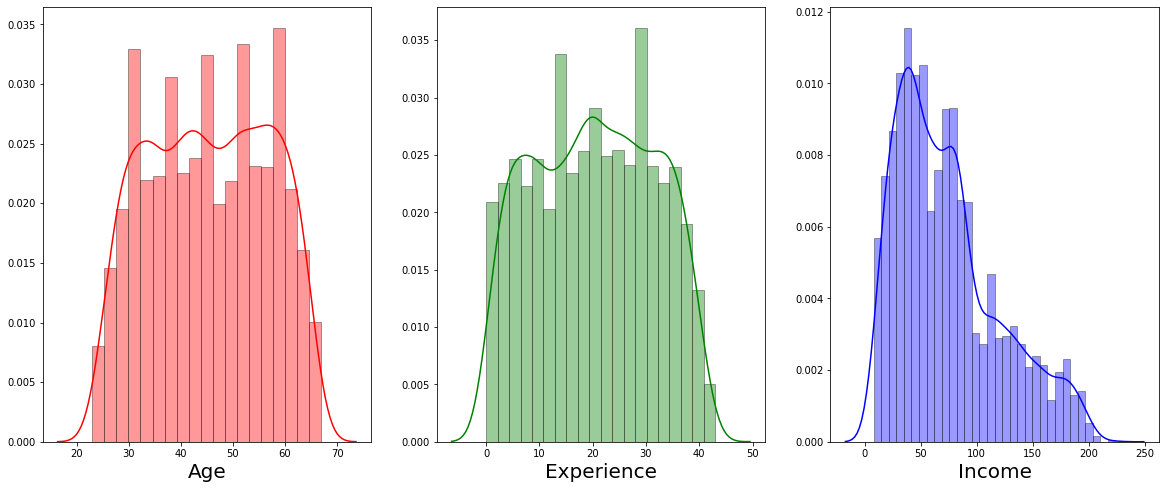

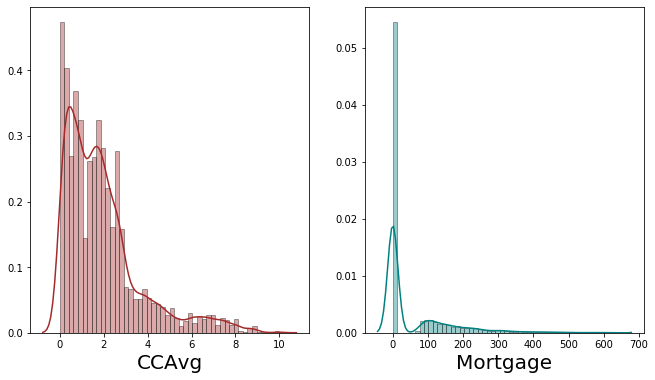

In [51]:
f, axes = plt.subplots(1, 3, figsize=(20, 8))
age = sns.distplot(bankLoan['Age'], color="red", ax=axes[0], kde=True, hist_kws={"edgecolor":"k"})
age.set_xlabel("Age",fontsize=20)

exp = sns.distplot(bankLoan['Experience'], color='green', ax = axes[1], kde=True, hist_kws={"edgecolor":"k"})
exp.set_xlabel("Experience",fontsize=20)

income = sns.distplot(bankLoan['Income'], color='blue', ax = axes[2], kde=True, hist_kws={"edgecolor":"k"})
income.set_xlabel("Income",fontsize=20)

f, axes = plt.subplots(1, 2, figsize=(11, 6))

ccavg = sns.distplot(bankLoan['CCAvg'], color="brown", ax=axes[0], kde=True, hist_kws={"edgecolor":"k"})
ccavg.set_xlabel("CCAvg",fontsize=20)

mort = sns.distplot(bankLoan['Mortgage'], color="teal", ax=axes[1], kde=True, hist_kws={"edgecolor":"k"})
mort.set_xlabel("Mortgage",fontsize=20)


#### Observations

1. **Age** and **Experience** are evenly distributed and looks almost the same
2. **Income** is slightly right skewed with few outliers
3. **CCAvg** is right skewed with few outliers
4. **Mortgage** contains many zeroes and lot of high values

In [52]:
#sns.distplot(bankLoanNew["Mortgage"].apply(np.log))
#bankLoanNew["Mortgage"].isna().sum()

In [53]:
pd.DataFrame.from_dict(dict(
    {
        'Age':bankLoan.Age.skew(), 
        'Experience': bankLoan.Experience.skew(), 
        'Income': bankLoan.Income.skew(),
        'CCAvg': bankLoan.CCAvg.skew(),
        'Mortgage': bankLoan.Mortgage.skew()        
    }), orient='index', columns=['Skewness'])

,Skewness
Age,-0.029341
Experience,-0.014100
Income,0.841339
CCAvg,1.598443
Mortgage,2.104002


1. **Age** : Value is is close to 0, hence uniformly distributed as shown in the plot above.
2. **Experience** : Values is close to 0, hence uniformly distributed as shown in the plot above.
3. **Income**: Value is slightly high and hence right skewed as shown in the plot above.
4. **CCAvg**: Value is high and hence right skewed as shown in the plot above.
5. **Mortgage**: Value is high and hence right skewed as shown in the plot above.

In [54]:
#from sklearn.preprocessing import FunctionTransformer
#transformer = FunctionTransformer(np.log1p)
#mort = bankLoan['Mortgage']
#data = transformer.fit_transform(mort[0].reshape(-1, 1))

#sns.distplot(data, color="teal", kde=True, hist_kws={"edgecolor":"k"})

## Checking the presence of outliers in ‘Income’, ‘CCAvg’ and ‘Mortgage’ columns

Text(0.5, 0, 'Mortgage')

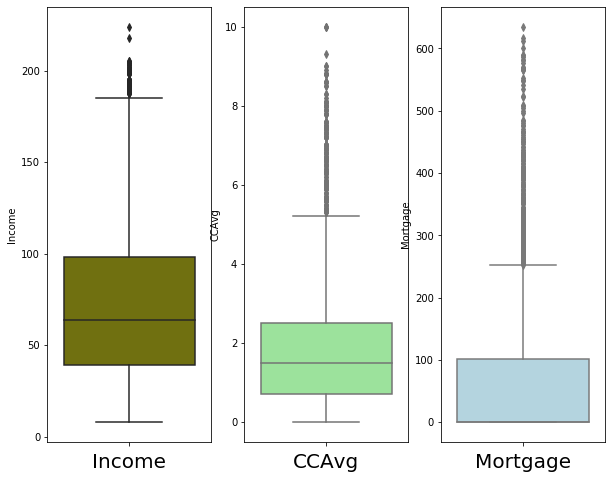

In [55]:
f, axes = plt.subplots(1, 3, figsize=(10, 8))
income = sns.boxplot(bankLoan['Income'], color="olive", ax=axes[0], orient='v')
income.set_xlabel("Income",fontsize=20)

ccavg = sns.boxplot(bankLoan['CCAvg'], color='lightgreen', ax=axes[1], orient='v')
ccavg.set_xlabel("CCAvg",fontsize=20)

mort = sns.boxplot(bankLoan['Mortgage'], color='lightblue', ax=axes[2], orient='v')
mort.set_xlabel("Mortgage",fontsize=20)


#### Observation
1. The above plots confirm the presence of several outliers in **Income**, **CCAvg**, **Mortgage** columns.
2. There is no bottom whisker or Q1(25%) for **Mortgage** as Q2(50%) starts at '0'. This means data is heavily skewed towards right with most of the values being zeros and others being high values. It can also seen that there lot more outliers than any other attribute.


## Different values of each categorical feature and their distributions

In [56]:
plData = pd.DataFrame(bankLoan['Personal Loan'].value_counts(), columns=['Personal Loan'])
saData = pd.DataFrame(bankLoan['Securities Account'].value_counts(), columns=['Securities Account'])
cdacctData = pd.DataFrame(bankLoan['CD Account'].value_counts(), columns=['CD Account'])
onlineData = pd.DataFrame(bankLoan['Online'].value_counts(), columns=['Online'])
ccData = pd.DataFrame(bankLoan['CreditCard'].value_counts(), columns=['CreditCard'])

cat = pd.concat([plData,saData,onlineData,cdacctData,ccData], axis=1)
display(cat)
print('=============================')
edu = pd.DataFrame(bankLoan.Education.value_counts(), columns=['Education'])
display(edu.sort_index())
print('=============================')
fam = pd.DataFrame(bankLoan.Family.value_counts(), columns=['Family'])
display(fam.sort_index())

,Personal Loan,Securities Account,Online,CD Account,CreditCard
0,4520,4478,2016,4698,3530
1,480,522,2984,302,1470


,Education
1,2096
2,1403
3,1501


,Family
1,1472
2,1296
3,1010
4,1222


Text(0.5, 0, 'Education')

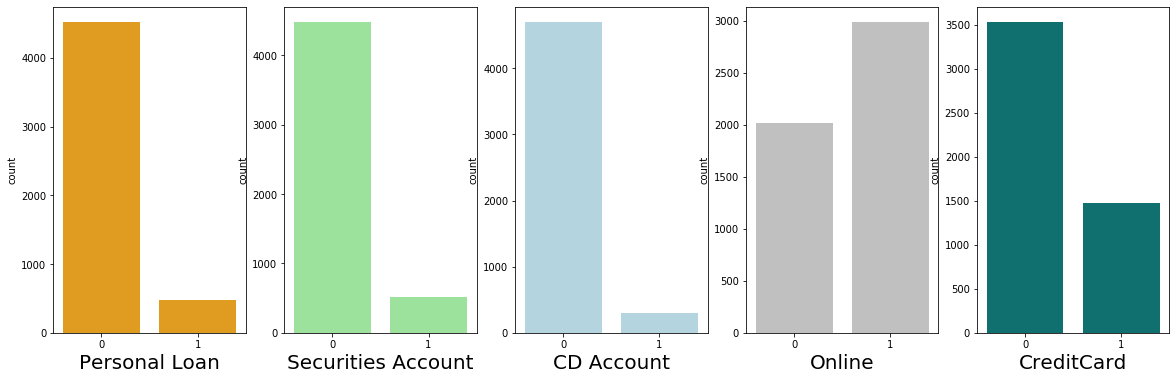

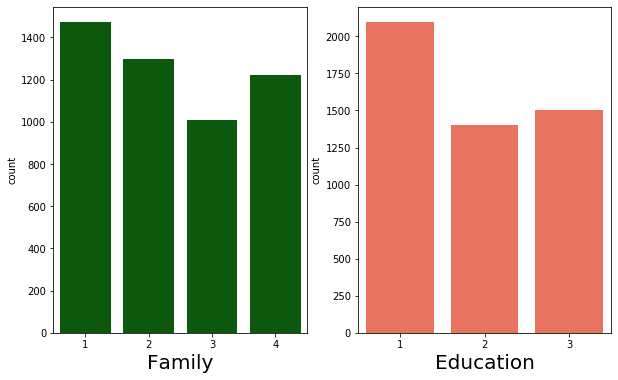

In [57]:
f, axes = plt.subplots(1, 5, figsize=(20, 6))
pl = sns.countplot(bankLoan['Personal Loan'], color="orange", ax=axes[0])
pl.set_xlabel("Personal Loan",fontsize=20)

secacct = sns.countplot(bankLoan['Securities Account'], color='lightgreen', ax = axes[1])
secacct.set_xlabel("Securities Account",fontsize=20)

cdacct = sns.countplot(bankLoan['CD Account'], color='lightblue', ax = axes[2])
cdacct.set_xlabel("CD Account",fontsize=20)

online = sns.countplot(bankLoan['Online'], color='silver', ax = axes[3])
online.set_xlabel("Online",fontsize=20)

cc = sns.countplot(bankLoan['CreditCard'], color='teal', ax = axes[4])
cc.set_xlabel("CreditCard",fontsize=20)

f, axes = plt.subplots(1, 2, figsize=(10, 6))
family = sns.countplot('Family',data=bankLoan, color='darkgreen', ax=axes[0])
family.set_xlabel("Family",fontsize=20)

edu = sns.countplot('Education',data=bankLoan, color='tomato', ax = axes[1])
edu.set_xlabel("Education",fontsize=20)

#### Observations

1. **Personal Loan**: This is the **TARGET** column. Many customers did not accept the personal loan offered and hence look very imbalanced.
2. **Securities Account**: Many customers do not have a securities account with the bank. Looks imbalanced.
3. **CD Account**: Many customers do not have a certificate of deposit (CD) account with the bank. Looks imbalanced.
4. **Online**: Customers usage of internet banking facilities is at 60% and no-usage is at 40%. This is fairly distributed.
5. **CreditCard**: Many customers (70%) do not use a credit card issued by UniversalBank.
6. **Family**: Family size is fairly distributed with size of '3' being a bit low, and personal loan accepted is also equally distributed across different family sizes.
7. **Education**: Education levels (Undergrads, Graduates, Professionals) are failrly distributed with undergrads being higher than others. Personal Loans accepted is gradually increased from undergraduates to professionals.

Text(0.5, 0, 'Education')

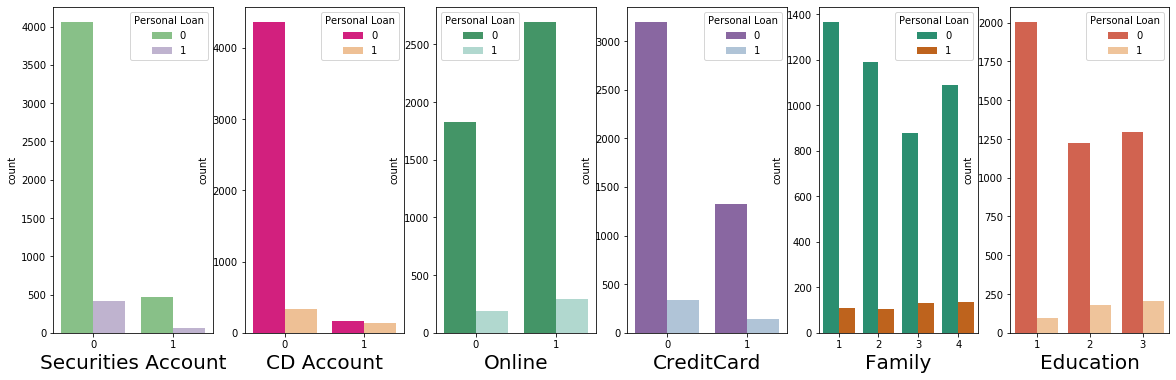

In [58]:
f, axes = plt.subplots(1, 6, figsize=(20, 6))

secacct = sns.countplot('Securities Account', data=bankLoan, hue='Personal Loan', palette='Accent', ax = axes[0])
secacct.set_xlabel("Securities Account",fontsize=20)

cdacct = sns.countplot(bankLoan['CD Account'], data=bankLoan, hue='Personal Loan', palette='Accent_r', ax = axes[1])
cdacct.set_xlabel("CD Account",fontsize=20)

online = sns.countplot(bankLoan['Online'], data=bankLoan, hue='Personal Loan', palette='BuGn_r', ax = axes[2])
online.set_xlabel("Online",fontsize=20)

cc = sns.countplot(bankLoan['CreditCard'], data=bankLoan, hue='Personal Loan', palette='BuPu_r', ax = axes[3])
cc.set_xlabel("CreditCard",fontsize=20)

#f, axes = plt.subplots(1, 2, figsize=(10, 6))
family = sns.countplot('Family',data=bankLoan, palette='Dark2', hue='Personal Loan', ax=axes[4])
family.set_xlabel("Family",fontsize=20)

edu = sns.countplot('Education',data=bankLoan, palette='OrRd_r', hue='Personal Loan', ax = axes[5])
edu.set_xlabel("Education",fontsize=20)

##### Observations

As per the data, customers who did not accept the **Personal Loan** are very high. The same is shown across different values of the categorical attributes **Securities Account**, **CD Account**, **Online**, **Family**, **Education**

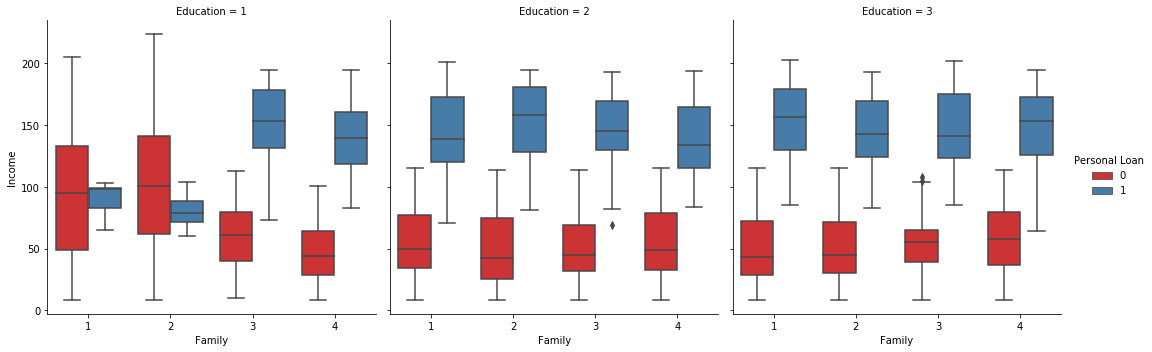

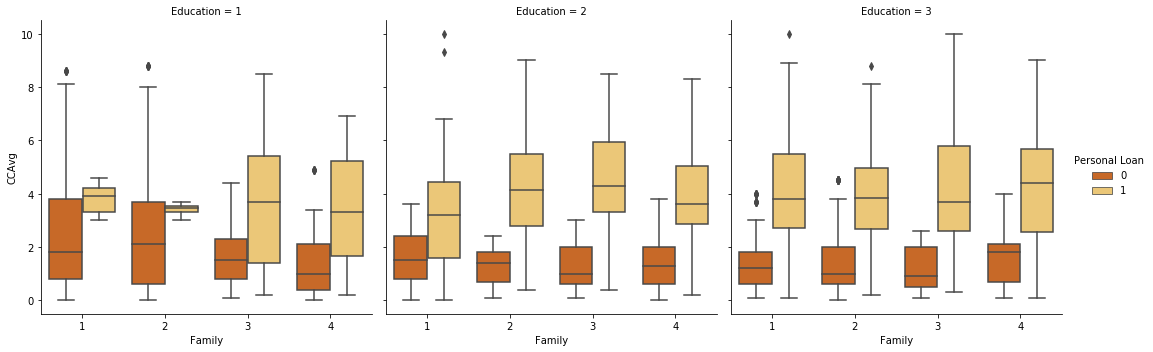

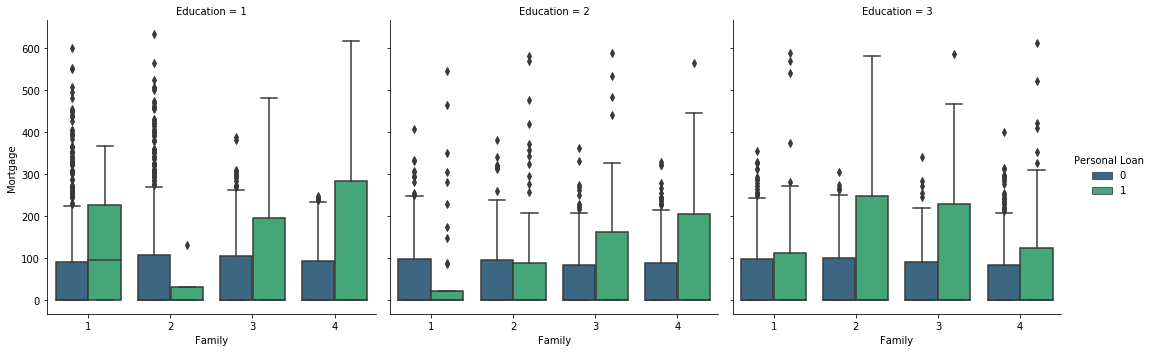

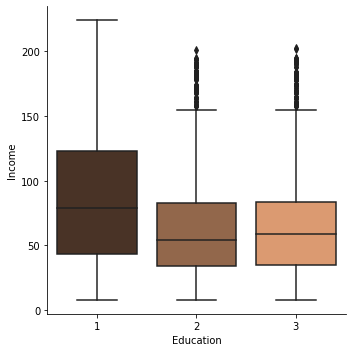

In [59]:
#f, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.catplot('Family', 'Income', data=bankLoan, hue='Personal Loan', col='Education', kind='box', palette='Set1')

sns.catplot('Family', 'CCAvg', data=bankLoan, hue='Personal Loan', col='Education', kind='box', palette='YlOrBr_r')

sns.catplot('Family', 'Mortgage', data=bankLoan, hue='Personal Loan', col='Education', kind='box', palette='viridis')

sns.catplot('Education', 'Income', data=bankLoan, kind='box', palette='copper')

#f, axes = plt.subplots(1, 1, figsize=(20, 6))
#sns.boxplot('Age', 'Income', data=bankLoan, hue='Personal Loan', palette='Reds_r', ax=axes)

#sns.boxplot('Family', 'Income', data=bankLoan, hue='Personal Loan')

## Multivariate Analysis

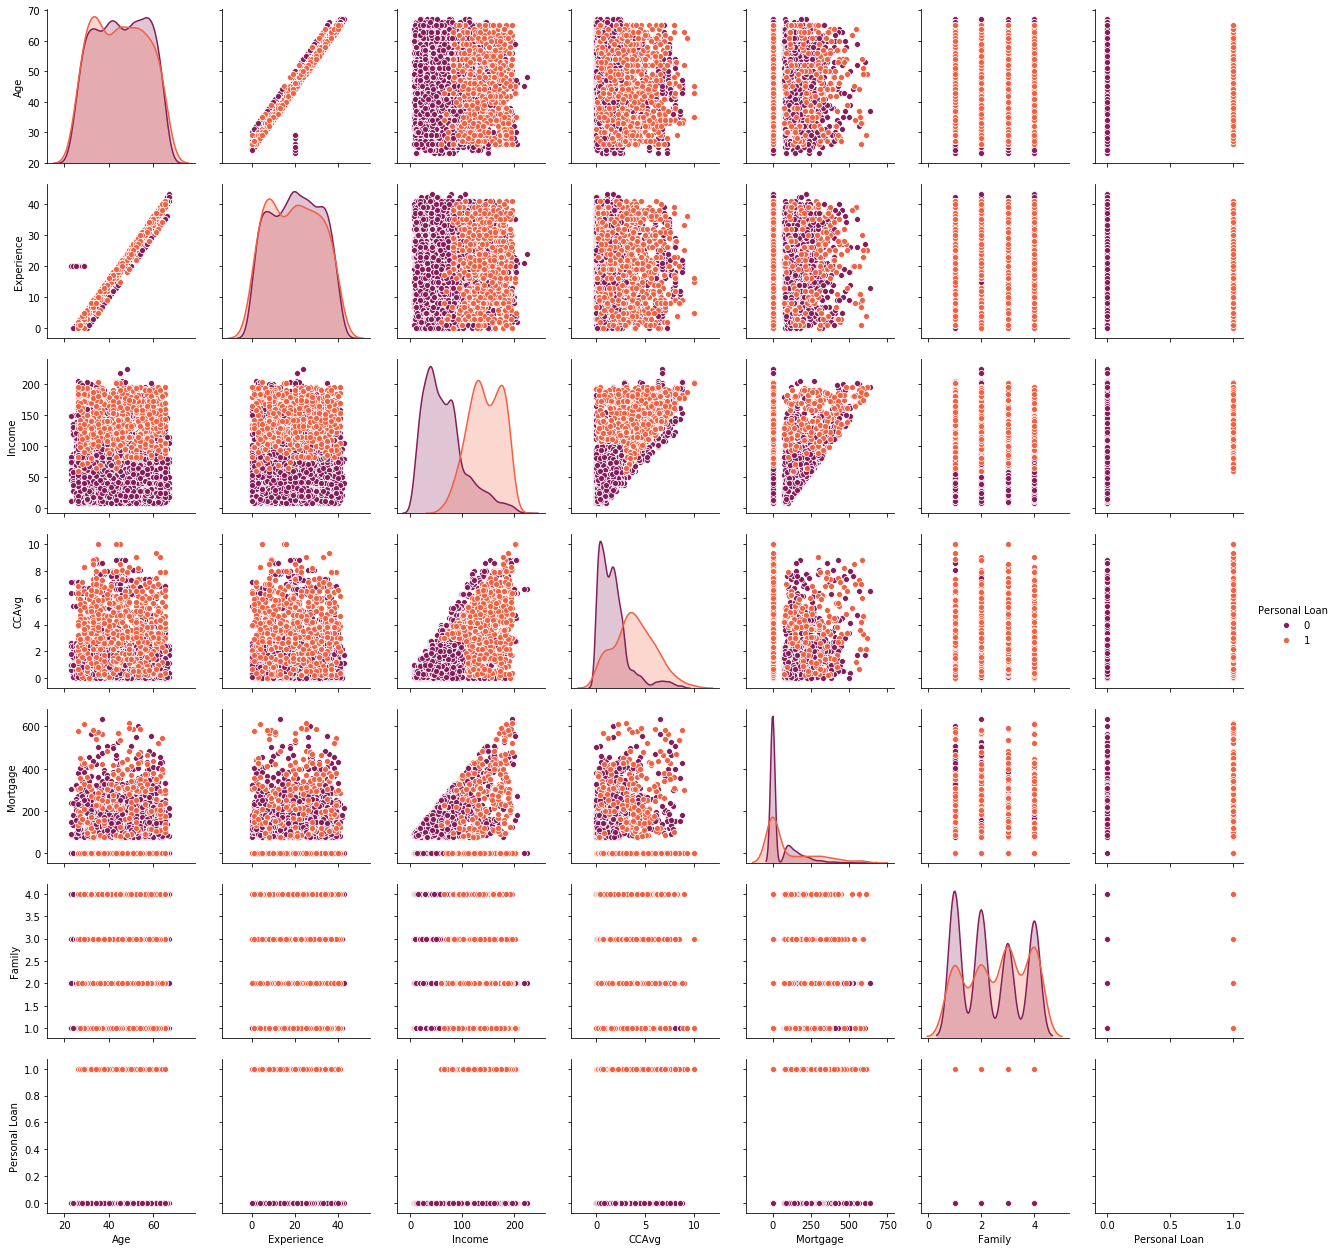

In [60]:
sns.pairplot(bankLoan[['Age','Experience','Income','CCAvg', 'Mortgage', 'Family', 'Personal Loan']], hue='Personal Loan', diag_kind = 'kde', palette='rocket')

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]), <a list of 12 Text xticklabel objects>)

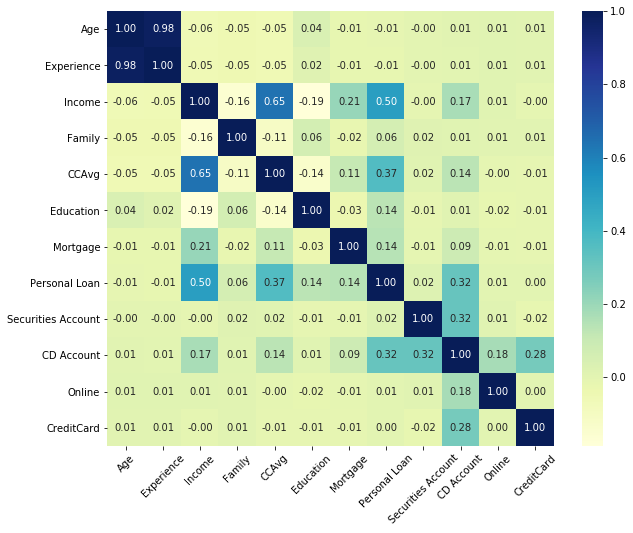

In [61]:
corrData = bankLoan.corr()
f, axes = plt.subplots(1, 1, figsize=(10, 8))
sns.heatmap(corrData,cmap='YlGnBu', ax=axes, annot=True, fmt=".2f")
plt.xticks(rotation=45)

#### Observations

1. **Age** and **Experience** have very high correlation (0.98) and the relationship is close to linearly perfect. This is shown is above pairplot and heatmap. Either one can be removed. 
2. **Income** and **CCAvg** have good correlation (0.65)
3. Target attribute **Personal Loan** has a good correlation with **Income**, **CCAvg** and **CD Account**

In [62]:
bankLoan['Education'] = bankLoan['Education'].astype(dtype='category')
bankLoan['Family'] = bankLoan['Family'].astype(dtype='category')

## Check Correlation Matrix and Heatmap for Dimensionality Reduction

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 <a list of 10 Text xticklabel objects>)

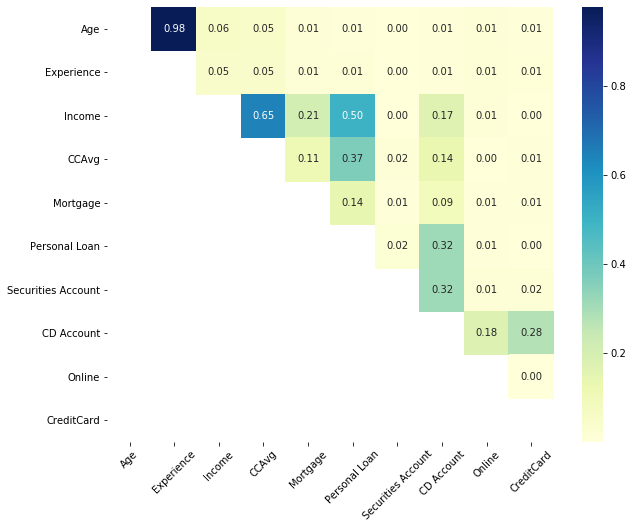

In [63]:
# Create correlation matrix
corr_matrix = bankLoan.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
f, axes = plt.subplots(1, 1, figsize=(10, 8))
sns.heatmap(upper,cmap='YlGnBu', annot=True, fmt=".2f", ax=axes)
plt.xticks(rotation=45)

In [64]:
# Find index of feature columns with correlation greater than 0.98
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
printmd('List of columns with correlation higher than 0.95', color='brown')
display(to_drop)

printmd('Removing **"Experience"** column due to **Multicollinearity**', color='brown')

bankLoanNew = bankLoan.drop('Experience', axis = 1)
bankLoanNew.info()

<span style='color:brown'>List of columns with correlation higher than 0.95</span>

['Experience']

<span style='color:brown'>Removing **"Experience"** column due to **Multicollinearity**</span>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
Age                   5000 non-null int64
Income                5000 non-null int64
Family                5000 non-null category
CCAvg                 5000 non-null float64
Education             5000 non-null category
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: category(2), float64(1), int64(8)
memory usage: 361.7 KB


## One-Hot Encoding for ‘Family’, ‘Education’ columns

In [65]:
from sklearn.preprocessing import OneHotEncoder

onehotencoder = OneHotEncoder(categories='auto')
encodedData = onehotencoder.fit_transform(bankLoanNew[['Family','Education']]).toarray() 
encodedFeatures = pd.DataFrame(encodedData, columns= onehotencoder.get_feature_names(['Family','Education']))
encodedFeatures.head(2)

,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [66]:
printmd('''Dropping last encoded feature in each attribute i.e **Family_4**, **Education_3** can be **DROPPED** as its information 
can be obtained from others''', color='brown')

encodedFeatures.drop(['Family_4', 'Education_3'], axis=1, inplace=True)
bankLoanNew.drop(['Family', 'Education'], axis=1, inplace=True)

<span style='color:brown'>Dropping last encoded feature in each attribute i.e **Family_4**, **Education_3** can be **DROPPED** as its information 
can be obtained from others</span>

In [67]:
encodedFeatures.head(2)

,Family_1,Family_2,Family_3,Education_1,Education_2
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,1.0,0.0


In [68]:
bankLoanNew = pd.concat([bankLoanNew,encodedFeatures],axis=1)
bankLoanNew.head(2)

,Age,Income,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Family_1,Family_2,Family_3,Education_1,Education_2
0,25,49,1.6,0,0,1,0,0,0,0.0,0.0,0.0,1.0,0.0
1,45,34,1.5,0,0,1,0,0,0,0.0,0.0,1.0,1.0,0.0


,Skewness
Mortgage Without Log Transformation,2.104002
Mortgage After First Log Transformation,0.876688
Mortgage After Second Log Transformation,0.842914


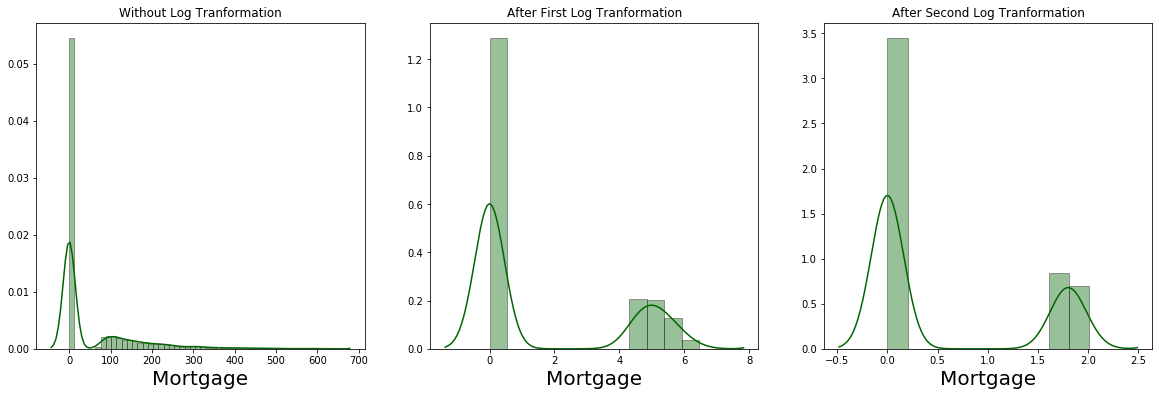

In [69]:
f, axes = plt.subplots(1, 3, figsize=(20, 6))

mort = sns.distplot(bankLoanNew['Mortgage'], color="darkgreen", ax=axes[0], kde=True, hist_kws={"edgecolor":"k"})
mort.set_xlabel("Mortgage",fontsize=20)
mort.set_title('Without Log Tranformation')

firstLogTransform = np.log1p(bankLoanNew['Mortgage'])
mort = sns.distplot(firstLogTransform, color="darkgreen", kde=True, ax=axes[1], hist_kws={"edgecolor":"k"})
mort.set_xlabel("Mortgage",fontsize=20)
mort.set_title('After First Log Tranformation')

secondLogTransform = np.log1p(firstLogTransform)
mort = sns.distplot(secondLogTransform, color="darkgreen", kde=True,ax=axes[2], hist_kws={"edgecolor":"k"})
mort.set_xlabel("Mortgage",fontsize=20)
mort.set_title('After Second Log Tranformation')

mortSkew = pd.DataFrame.from_dict(dict(
    {
        'Mortgage Without Log Transformation':bankLoan.Mortgage.skew(), 
        'Mortgage After First Log Transformation': firstLogTransform.skew(), 
        'Mortgage After Second Log Transformation': secondLogTransform.skew()
    }), orient='index', columns=['Skewness'])

display(mortSkew)

bankLoanNew['Mortgage'] = secondLogTransform

## Split the data into training and test set in the ratio of 70:30 respectively

In [70]:
printmd('**As "Personal Loan" attribute is imbalanced, STRATIFYING the same to maintain the same percentage of distribution**', color='brown')
X = bankLoanNew.loc[:, bankLoanNew.columns != 'Personal Loan']
y = bankLoanNew['Personal Loan']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size =.30, random_state=1)

printmd('**Training and Testing Set Distribution**', color='brown')

print(f'Training set has {X_train.shape[0]} rows and {X_train.shape[1]} columns')
print(f'Testing set has {X_test.shape[0]} rows and {X_test.shape[1]} columns')

printmd('**Original Set Target Value Distribution**', color='brown')

print("Original Personal Loan '1' Values    : {0} ({1:0.2f}%)".format(len(bankLoanNew.loc[bankLoanNew['Personal Loan'] == 1]), (len(bankLoanNew.loc[bankLoanNew['Personal Loan'] == 1])/len(bankLoanNew.index)) * 100))
print("Original Personal Loan '0' Values   : {0} ({1:0.2f}%)".format(len(bankLoanNew.loc[bankLoanNew['Personal Loan'] == 0]), (len(bankLoanNew.loc[bankLoanNew['Personal Loan'] == 0])/len(bankLoanNew.index)) * 100))

printmd('**Training Set Target Value Distribution**', color='brown')

print("Training Personal Loan '1' Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Personal Loan '0' Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))

printmd('**Testing Set Target Value Distribution**', color='brown')
print("Test Personal Loan '1' Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Personal Loan '0' Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))


<span style='color:brown'>**As "Personal Loan" attribute is imbalanced, STRATIFYING the same to maintain the same percentage of distribution**</span>

<span style='color:brown'>**Training and Testing Set Distribution**</span>

Training set has 3500 rows and 13 columns
Testing set has 1500 rows and 13 columns


<span style='color:brown'>**Original Set Target Value Distribution**</span>

Original Personal Loan '1' Values    : 480 (9.60%)
Original Personal Loan '0' Values   : 4520 (90.40%)


<span style='color:brown'>**Training Set Target Value Distribution**</span>

Training Personal Loan '1' Values    : 336 (9.60%)
Training Personal Loan '0' Values   : 3164 (90.40%)


<span style='color:brown'>**Testing Set Target Value Distribution**</span>

Test Personal Loan '1' Values        : 144 (9.60%)
Test Personal Loan '0' Values       : 1356 (90.40%)


In [71]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.fit_transform(X_test)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5]), <a list of 13 Text xticklabel objects>)

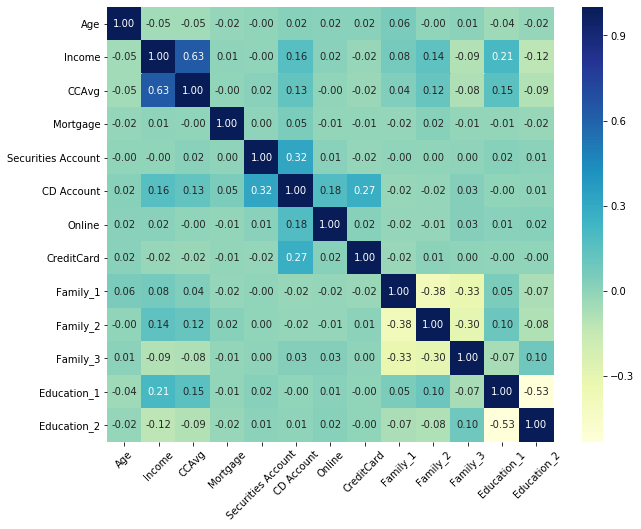

In [72]:
f, axes = plt.subplots(1, 1, figsize=(10, 8))
sns.heatmap(pd.DataFrame(X_train_scaled).corr(),cmap='YlGnBu', ax=axes, annot=True, fmt=".2f",xticklabels=X_train.columns, yticklabels=X_train.columns)
plt.xticks(rotation=45)

## Logistic Regression

,Training,Testing
Accuracy,0.962857,0.956000
Mean Squared Error,0.037143,0.044000
Precision,0.875912,0.861111
Recall,0.714286,0.645833
F1 Score,0.786885,0.738095
ROC AUC Score,0.851770,0.817386


<span style='color:brown'>**Confusion Matrix**</span>

Predicted,0,1
Actual,,
0,1341,15
1,51,93


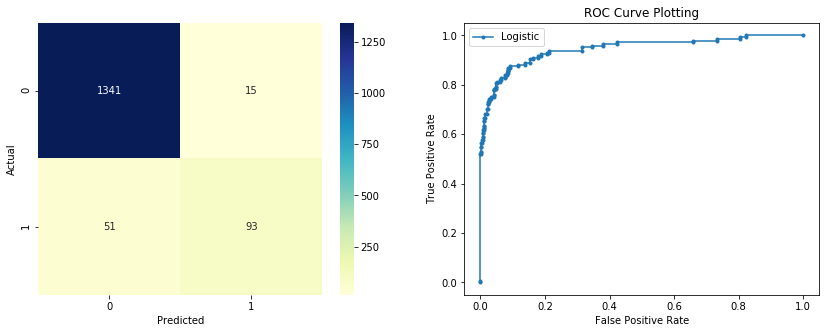

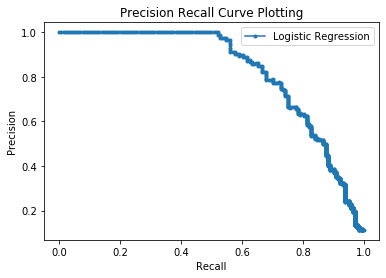

0.8259128829923149


In [73]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

# Fit the model on train
logRegModel = LogisticRegression()
logRegModel.fit(X_train_scaled, y_train)
#predict on test
y_train_pred = logRegModel.predict(X_train_scaled)
y_test_pred = logRegModel.predict(X_test_scaled)

y_test_pred_proba = logRegModel.predict_proba(X_test_scaled)

accuracy_train = metrics.accuracy_score(y_train, y_train_pred)
accuracy_test = metrics.accuracy_score(y_test, y_test_pred)
accdf = pd.DataFrame([[accuracy_train, accuracy_test, ]], columns=['Training', 'Testing'], index=['Accuracy'])

mse_train = metrics.mean_squared_error(y_train, y_train_pred)
mse_test = metrics.mean_squared_error(y_test, y_test_pred)
msedf = pd.DataFrame([[mse_train, mse_test, ]], columns=['Training', 'Testing'], index=['Mean Squared Error'])

precision_train = metrics.precision_score(y_train, y_train_pred)
precision_test = metrics.precision_score(y_test, y_test_pred)
precdf = pd.DataFrame([[precision_train, precision_test, ]], columns=['Training', 'Testing'], index=['Precision'])

recall_train = metrics.recall_score(y_train, y_train_pred)
recall_test = metrics.recall_score(y_test, y_test_pred)
recdf = pd.DataFrame([[recall_train, recall_test, ]], columns=['Training', 'Testing'], index=['Recall'])

f1_score_train = metrics.f1_score(y_train, y_train_pred)
f1_score_test = metrics.f1_score(y_test, y_test_pred)
f1sdf = pd.DataFrame([[f1_score_train, f1_score_test, ]], columns=['Training', 'Testing'], index=['F1 Score'])

roc_auc_score_train = metrics.roc_auc_score(y_train, y_train_pred)
roc_auc_score_test = metrics.roc_auc_score(y_test, y_test_pred)
rocaucsdf = pd.DataFrame([[roc_auc_score_train, roc_auc_score_test, ]], columns=['Training', 'Testing'], index=['ROC AUC Score'])

display(pd.concat([accdf, msedf,precdf,recdf,f1sdf, rocaucsdf]))


#print('tn, fp, fn, tp')
print('======================================')
printmd('**Confusion Matrix**', color='brown')
confusion_matrix_test = pd.crosstab(y_test, y_test_pred, rownames=['Actual'], colnames=['Predicted'])
display(confusion_matrix_test)

f, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.heatmap(confusion_matrix_test, cmap='YlGnBu', annot=True, fmt=".0f", ax=axes[0])

fpr, tpr, threshold = metrics.roc_curve(y_test,y_test_pred_proba[:,1])
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.axes(axes[1])
plt.title("ROC Curve Plotting")
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

precision, recall, thresholds = metrics.precision_recall_curve(y_test,y_test_pred_proba[:,1])
plt.plot(recall, precision, marker='.', label='Logistic Regression')
plt.title("Precision Recall Curve Plotting")
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

print(metrics.auc(recall, precision))

## Naive Bayes Classification

,Training,Testing
Accuracy,0.900286,0.913333
Mean Squared Error,0.099714,0.086667
Precision,0.483544,0.540698
Recall,0.568452,0.645833
F1 Score,0.522572,0.588608
ROC AUC Score,0.751989,0.793787


<span style='color:brown'>**Confusion Matrix**</span>

Predicted,0,1
Actual,,
0,1277,79
1,51,93


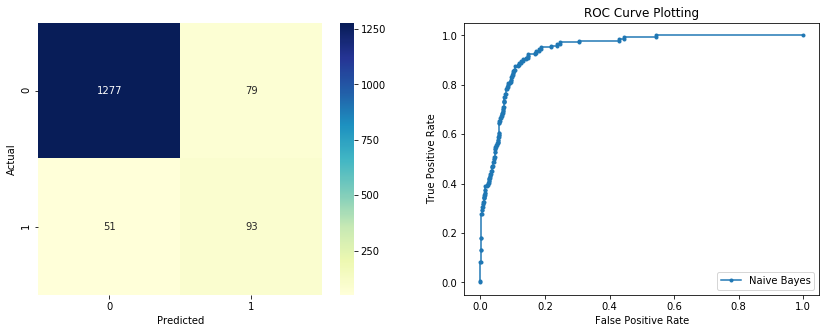

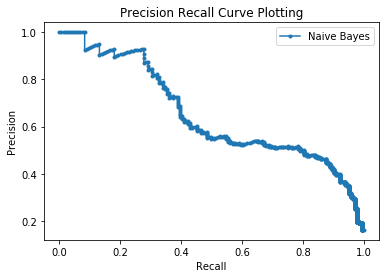

0.653249200712404


In [74]:
from sklearn.naive_bayes import GaussianNB

# Fit the model on train
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)
#predict on test
y_train_pred = gnb.predict(X_train_scaled)
y_test_pred = gnb.predict(X_test_scaled)

y_test_pred_proba = gnb.predict_proba(X_test_scaled)

accuracy_train = metrics.accuracy_score(y_train, y_train_pred)
accuracy_test = metrics.accuracy_score(y_test, y_test_pred)
accdf = pd.DataFrame([[accuracy_train, accuracy_test, ]], columns=['Training', 'Testing'], index=['Accuracy'])

mse_train = metrics.mean_squared_error(y_train, y_train_pred)
mse_test = metrics.mean_squared_error(y_test, y_test_pred)
msedf = pd.DataFrame([[mse_train, mse_test, ]], columns=['Training', 'Testing'], index=['Mean Squared Error'])

precision_train = metrics.precision_score(y_train, y_train_pred)
precision_test = metrics.precision_score(y_test, y_test_pred)
precdf = pd.DataFrame([[precision_train, precision_test, ]], columns=['Training', 'Testing'], index=['Precision'])

recall_train = metrics.recall_score(y_train, y_train_pred)
recall_test = metrics.recall_score(y_test, y_test_pred)
recdf = pd.DataFrame([[recall_train, recall_test, ]], columns=['Training', 'Testing'], index=['Recall'])

f1_score_train = metrics.f1_score(y_train, y_train_pred)
f1_score_test = metrics.f1_score(y_test, y_test_pred)
f1sdf = pd.DataFrame([[f1_score_train, f1_score_test, ]], columns=['Training', 'Testing'], index=['F1 Score'])

roc_auc_score_train = metrics.roc_auc_score(y_train, y_train_pred)
roc_auc_score_test = metrics.roc_auc_score(y_test, y_test_pred)
rocaucsdf = pd.DataFrame([[roc_auc_score_train, roc_auc_score_test, ]], columns=['Training', 'Testing'], index=['ROC AUC Score'])

display(pd.concat([accdf, msedf,precdf,recdf,f1sdf, rocaucsdf]))

print('======================================')
printmd('**Confusion Matrix**', color='brown')
confusion_matrix_test = pd.crosstab(y_test, y_test_pred, rownames=['Actual'], colnames=['Predicted'])
display(confusion_matrix_test)

f, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.heatmap(confusion_matrix_test, cmap='YlGnBu', annot=True, fmt=".0f", ax=axes[0])

fpr, tpr, threshold = metrics.roc_curve(y_test,y_test_pred_proba[:,1])
plt.plot(fpr, tpr, marker='.', label='Naive Bayes')
plt.axes(axes[1])
plt.title("ROC Curve Plotting")
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()


precision, recall, thresholds = metrics.precision_recall_curve(y_test,y_test_pred_proba[:,1])
plt.plot(recall, precision, marker='.', label='Naive Bayes')
plt.title("Precision Recall Curve Plotting")
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

print(metrics.auc(recall, precision))

## KNN Classification

,Training,Testing
Accuracy,0.979429,0.962000
Mean Squared Error,0.020571,0.038000
Precision,0.981752,0.922330
Recall,0.800595,0.659722
F1 Score,0.881967,0.769231
ROC AUC Score,0.899507,0.826911


<span style='color:brown'>**Confusion Matrix**</span>

Predicted,0,1
Actual,,
0,1348,8
1,49,95


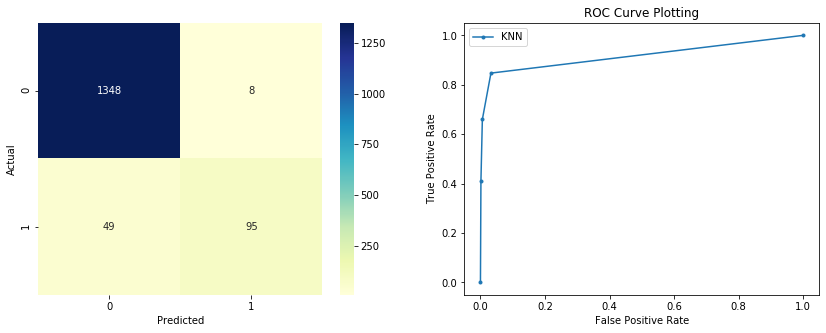

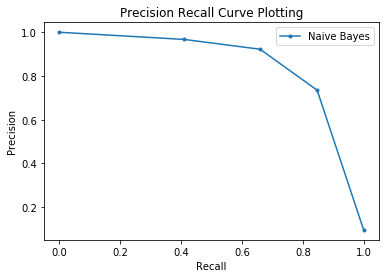

0.8580419798990113


In [75]:
from sklearn.neighbors import KNeighborsClassifier

# Fit the model on train
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_scaled, y_train)
#predict on test
y_train_pred = neigh.predict(X_train_scaled)
y_test_pred = neigh.predict(X_test_scaled)

y_test_pred_proba = neigh.predict_proba(X_test_scaled)

accuracy_train = metrics.accuracy_score(y_train, y_train_pred)
accuracy_test = metrics.accuracy_score(y_test, y_test_pred)
accdf = pd.DataFrame([[accuracy_train, accuracy_test, ]], columns=['Training', 'Testing'], index=['Accuracy'])

mse_train = metrics.mean_squared_error(y_train, y_train_pred)
mse_test = metrics.mean_squared_error(y_test, y_test_pred)
msedf = pd.DataFrame([[mse_train, mse_test, ]], columns=['Training', 'Testing'], index=['Mean Squared Error'])

precision_train = metrics.precision_score(y_train, y_train_pred)
precision_test = metrics.precision_score(y_test, y_test_pred)
precdf = pd.DataFrame([[precision_train, precision_test, ]], columns=['Training', 'Testing'], index=['Precision'])

recall_train = metrics.recall_score(y_train, y_train_pred)
recall_test = metrics.recall_score(y_test, y_test_pred)
recdf = pd.DataFrame([[recall_train, recall_test, ]], columns=['Training', 'Testing'], index=['Recall'])

f1_score_train = metrics.f1_score(y_train, y_train_pred)
f1_score_test = metrics.f1_score(y_test, y_test_pred)
f1sdf = pd.DataFrame([[f1_score_train, f1_score_test, ]], columns=['Training', 'Testing'], index=['F1 Score'])

roc_auc_score_train = metrics.roc_auc_score(y_train, y_train_pred)
roc_auc_score_test = metrics.roc_auc_score(y_test, y_test_pred)
rocaucsdf = pd.DataFrame([[roc_auc_score_train, roc_auc_score_test, ]], columns=['Training', 'Testing'], index=['ROC AUC Score'])

display(pd.concat([accdf, msedf,precdf,recdf,f1sdf, rocaucsdf]))

print('======================================')
printmd('**Confusion Matrix**', color='brown')
confusion_matrix_test = pd.crosstab(y_test, y_test_pred, rownames=['Actual'], colnames=['Predicted'])
display(confusion_matrix_test)

f, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.heatmap(confusion_matrix_test, cmap='YlGnBu', annot=True, fmt=".0f", ax=axes[0])

fpr, tpr, threshold = metrics.roc_curve(y_test,y_test_pred_proba[:,1])
plt.plot(fpr, tpr, marker='.', label='KNN')
plt.axes(axes[1])
plt.title("ROC Curve Plotting")
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

precision, recall, thresholds = metrics.precision_recall_curve(y_test,y_test_pred_proba[:,1])
plt.plot(recall, precision, marker='.', label='Naive Bayes')
plt.title("Precision Recall Curve Plotting")
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

print(metrics.auc(recall, precision))

,Training,Testing
Accuracy,1.0,0.966000
Mean Squared Error,0.0,0.034000
Precision,1.0,0.807947
Recall,1.0,0.847222
F1 Score,1.0,0.827119
ROC AUC Score,1.0,0.912918


<span style='color:brown'>**Confusion Matrix**</span>

Predicted,0,1
Actual,,
0,1327,29
1,22,122


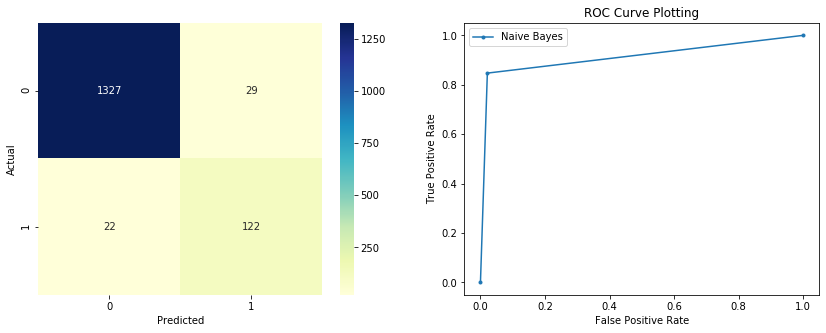

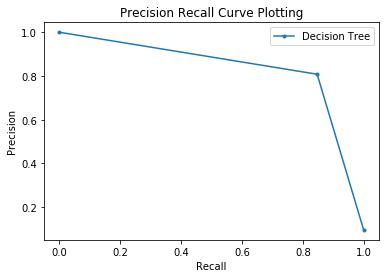

0.8349179543782194


In [76]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

dtree.fit(X_train_scaled, y_train)

y_train_pred = dtree.predict(X_train_scaled)
y_test_pred = dtree.predict(X_test_scaled)

y_test_pred_proba = dtree.predict_proba(X_test_scaled)

accuracy_train = metrics.accuracy_score(y_train, y_train_pred)
accuracy_test = metrics.accuracy_score(y_test, y_test_pred)
accdf = pd.DataFrame([[accuracy_train, accuracy_test, ]], columns=['Training', 'Testing'], index=['Accuracy'])

mse_train = metrics.mean_squared_error(y_train, y_train_pred)
mse_test = metrics.mean_squared_error(y_test, y_test_pred)
msedf = pd.DataFrame([[mse_train, mse_test, ]], columns=['Training', 'Testing'], index=['Mean Squared Error'])

precision_train = metrics.precision_score(y_train, y_train_pred)
precision_test = metrics.precision_score(y_test, y_test_pred)
precdf = pd.DataFrame([[precision_train, precision_test, ]], columns=['Training', 'Testing'], index=['Precision'])

recall_train = metrics.recall_score(y_train, y_train_pred)
recall_test = metrics.recall_score(y_test, y_test_pred)
recdf = pd.DataFrame([[recall_train, recall_test, ]], columns=['Training', 'Testing'], index=['Recall'])

f1_score_train = metrics.f1_score(y_train, y_train_pred)
f1_score_test = metrics.f1_score(y_test, y_test_pred)
f1sdf = pd.DataFrame([[f1_score_train, f1_score_test, ]], columns=['Training', 'Testing'], index=['F1 Score'])

roc_auc_score_train = metrics.roc_auc_score(y_train, y_train_pred)
roc_auc_score_test = metrics.roc_auc_score(y_test, y_test_pred)
rocaucsdf = pd.DataFrame([[roc_auc_score_train, roc_auc_score_test, ]], columns=['Training', 'Testing'], index=['ROC AUC Score'])

display(pd.concat([accdf, msedf,precdf,recdf,f1sdf, rocaucsdf]))

print('======================================')
printmd('**Confusion Matrix**', color='brown')
confusion_matrix_test = pd.crosstab(y_test, y_test_pred, rownames=['Actual'], colnames=['Predicted'])
display(confusion_matrix_test)

f, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.heatmap(confusion_matrix_test, cmap='YlGnBu', annot=True, fmt=".0f", ax=axes[0])

fpr, tpr, threshold = metrics.roc_curve(y_test,y_test_pred_proba[:,1])
plt.plot(fpr, tpr, marker='.', label='Naive Bayes')
plt.axes(axes[1])
plt.title("ROC Curve Plotting")
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()


precision, recall, thresholds = metrics.precision_recall_curve(y_test,y_test_pred_proba[:,1])
plt.plot(recall, precision, marker='.', label='Decision Tree')
plt.title("Precision Recall Curve Plotting")
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

print(metrics.auc(recall, precision))

In [77]:
f_imp =pd.DataFrame(dtree.feature_importances_, index=X_train.columns, columns=['Imp'])
f_imp.sort_values(by='Imp')

,Imp
Securities Account,0.000000
CreditCard,0.000000
Education_2,0.001251
Online,0.003790
Mortgage,0.009705
CD Account,0.014847
Family_1,0.023963
Age,0.032976
CCAvg,0.056841
Family_3,0.058560
